In [1]:
# This is to access the package without it being installed for testing.
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
from pylossmap.loader import LossMapFetcher
from pylossmap.utils import get_ADT
import pandas as pd

/home/lcoyle/.config/miniconda3/envs/loss_maps/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
fetcher = LossMapFetcher()

In [4]:
t1 = pd.to_datetime('2018-04-06 00:00:00').tz_localize('Europe/Zurich')
t2 = pd.to_datetime('2018-04-07 00:00:00').tz_localize('Europe/Zurich')

Gets BLM data surrounding ADT blowup triggers in specified interval, 5s before and 20s after trigger.

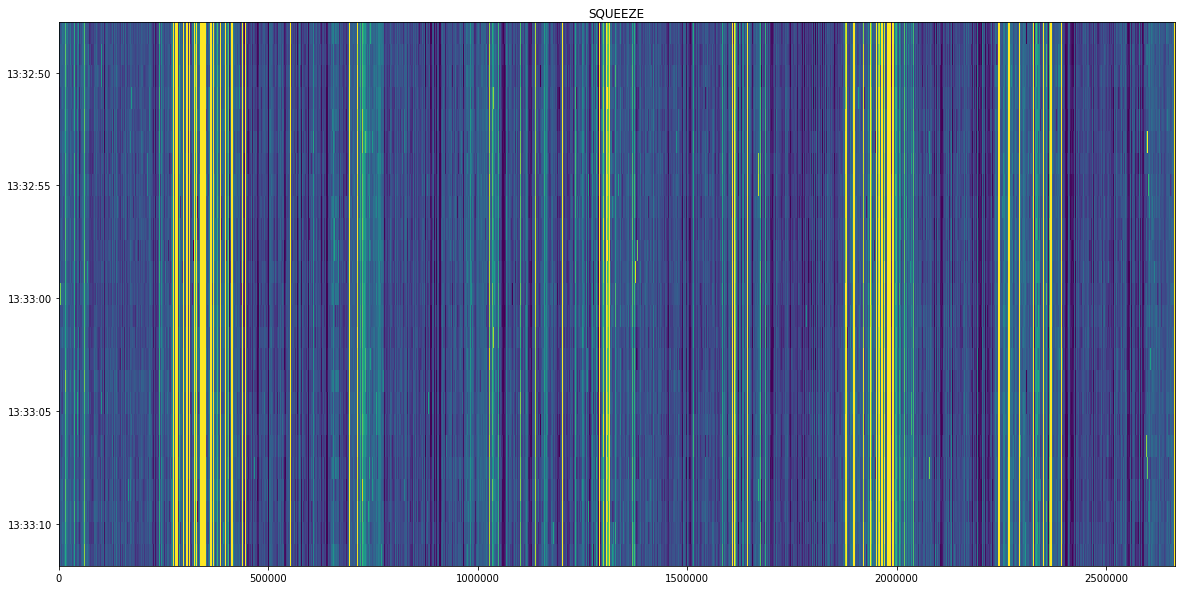

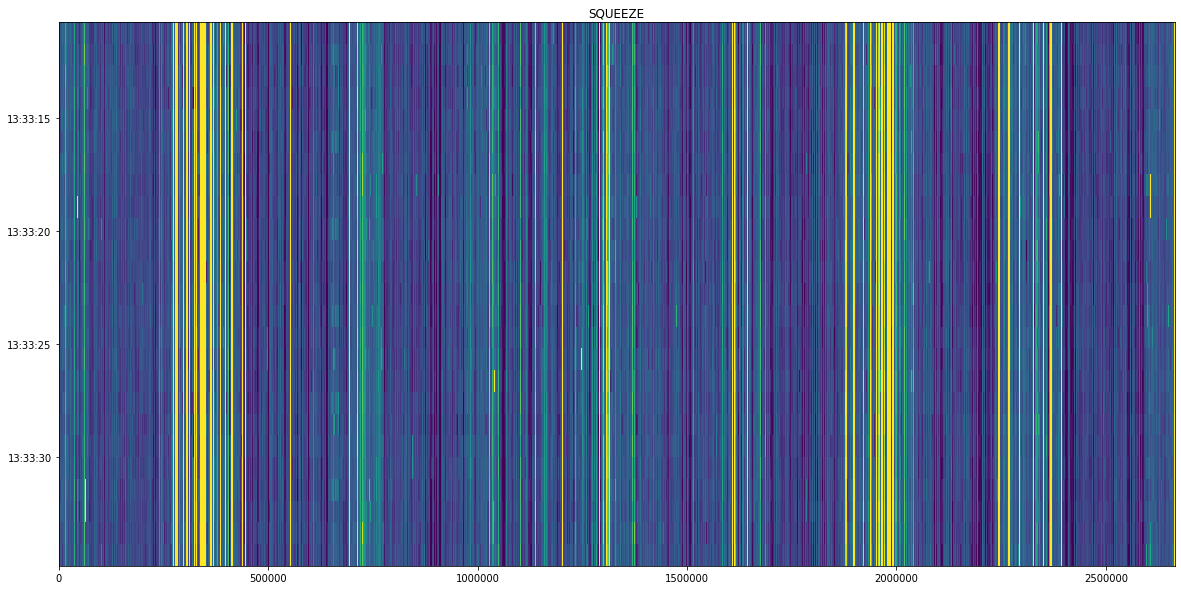

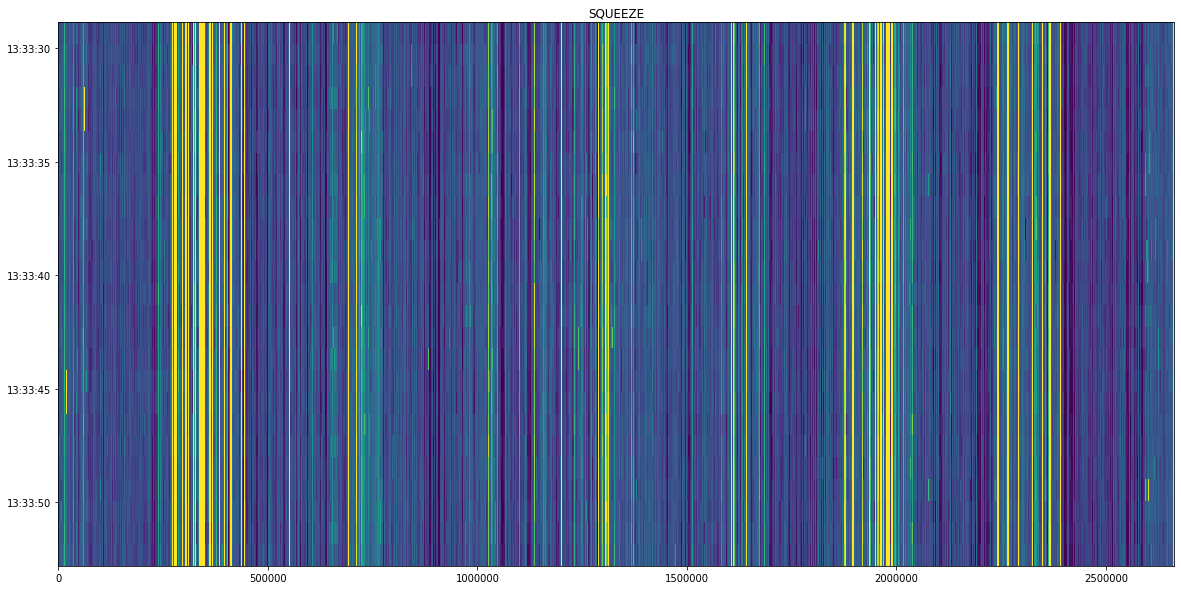

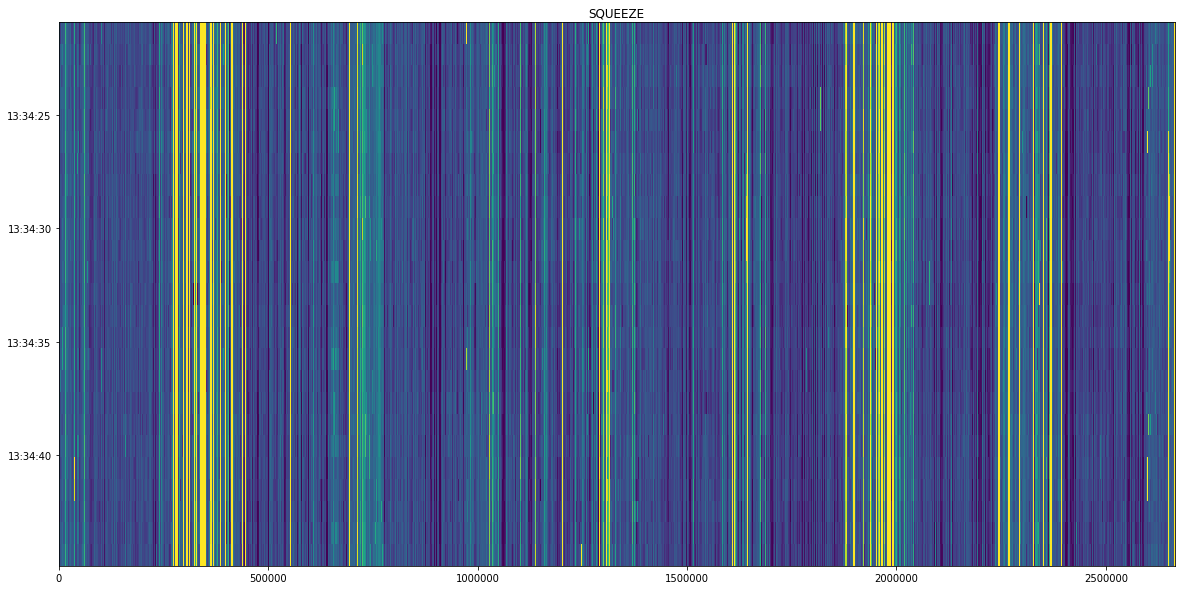

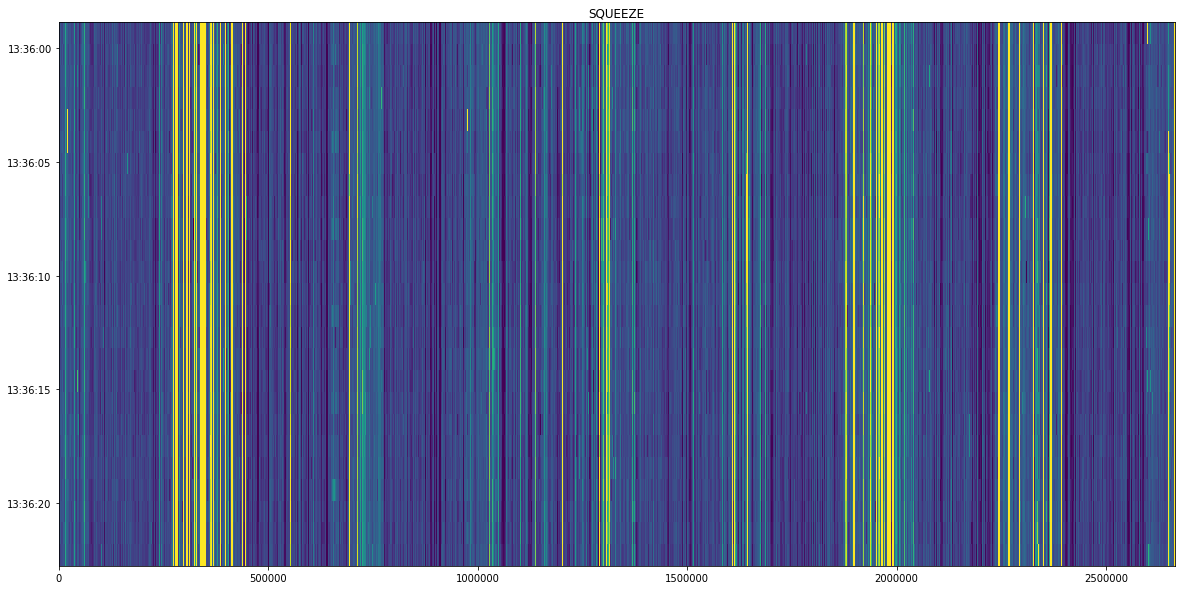

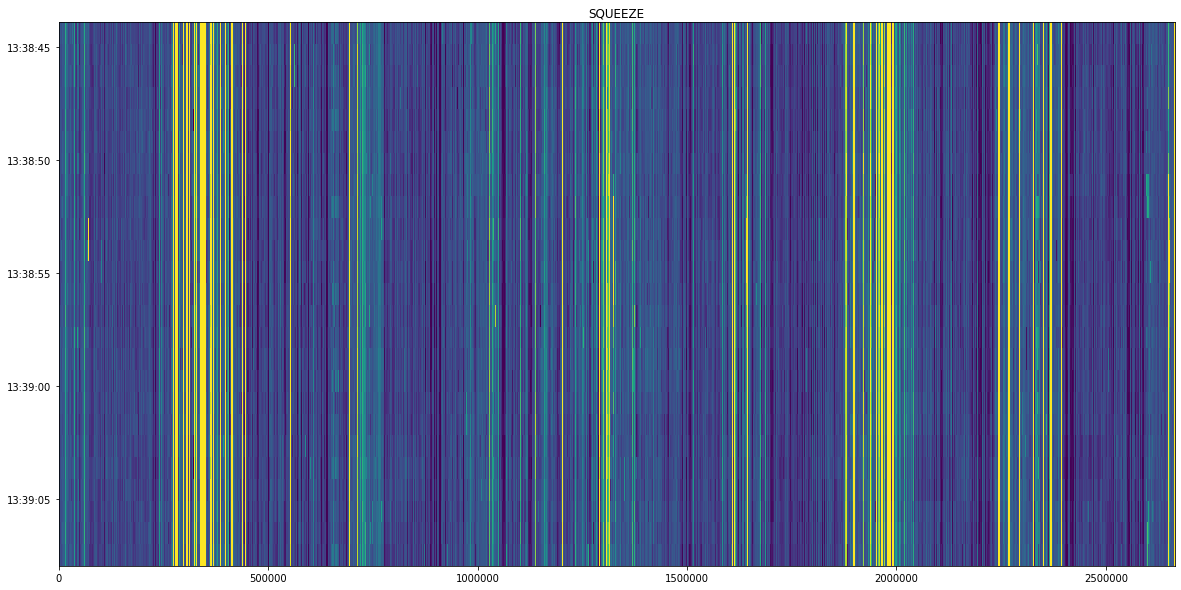

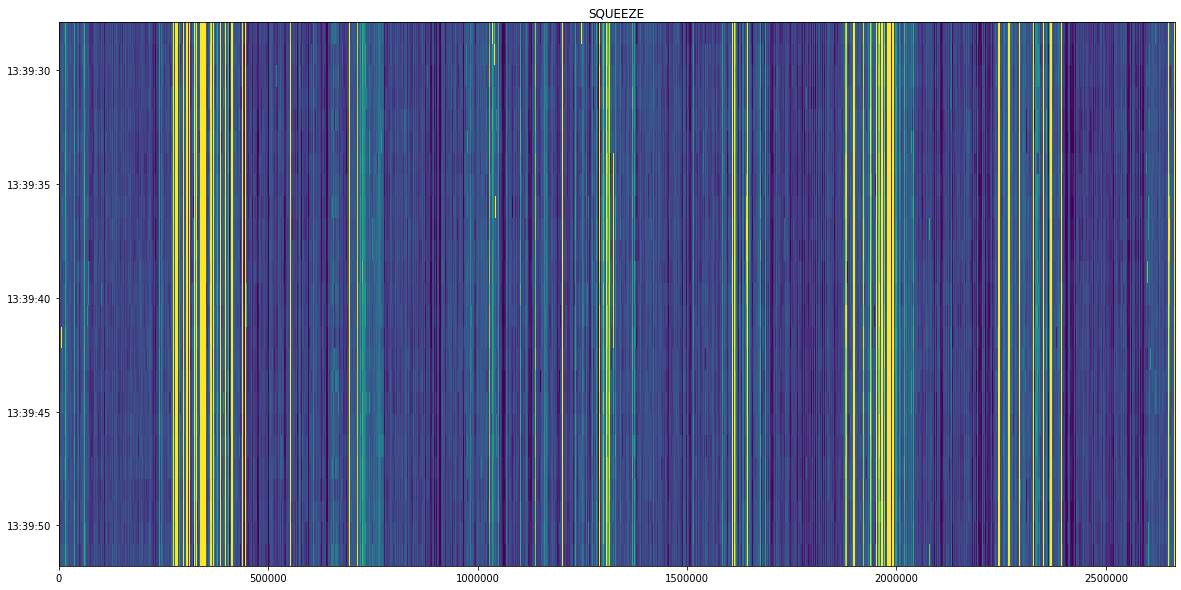

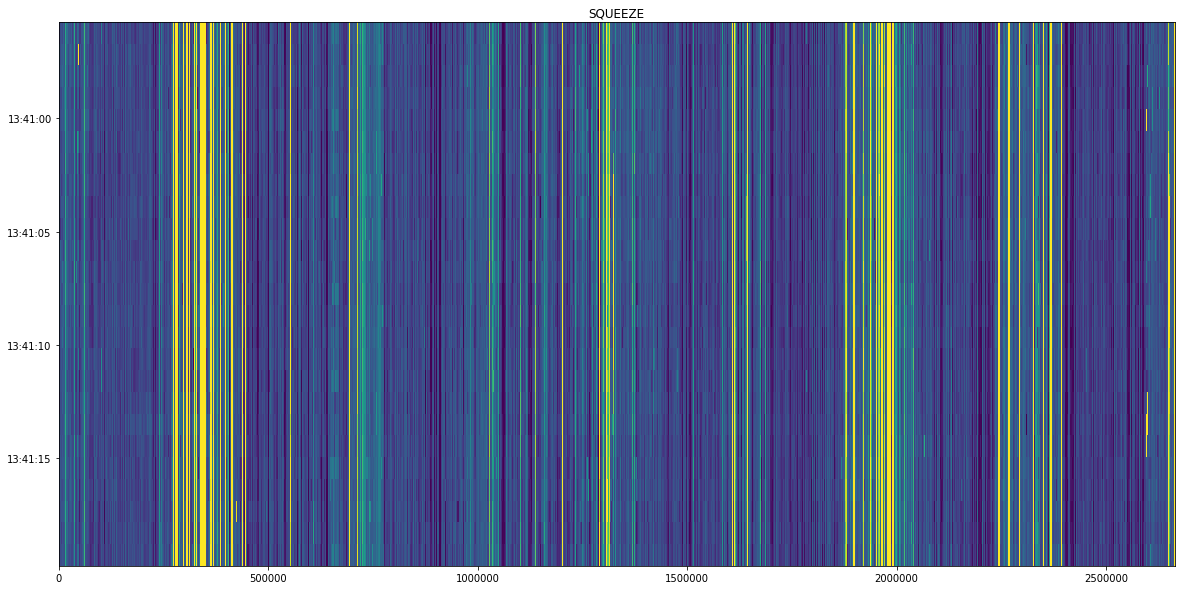

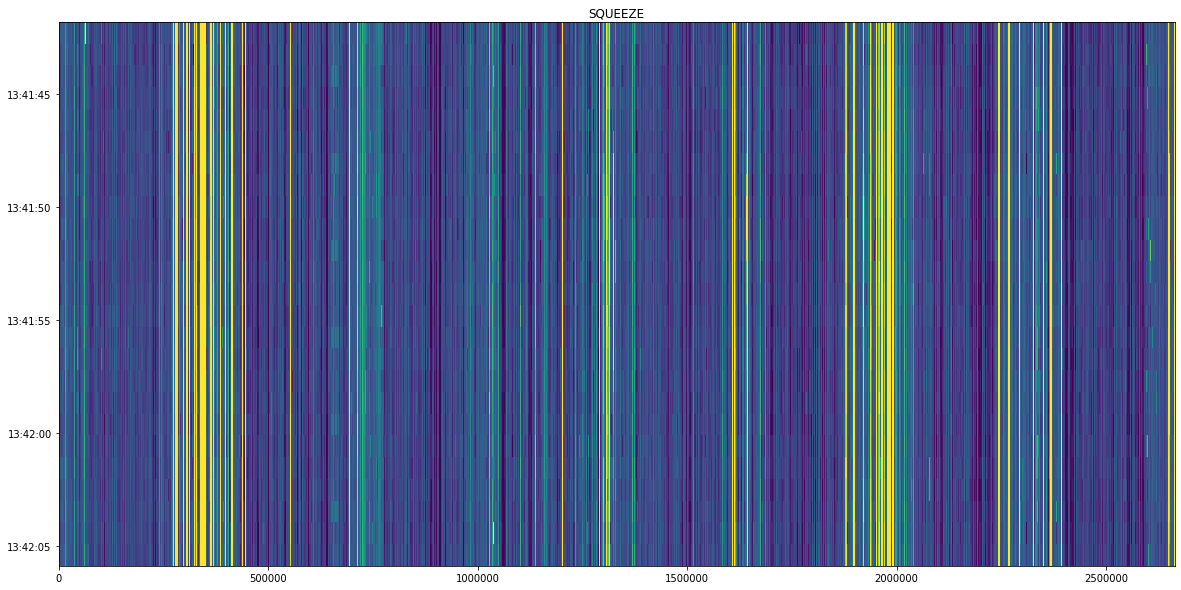

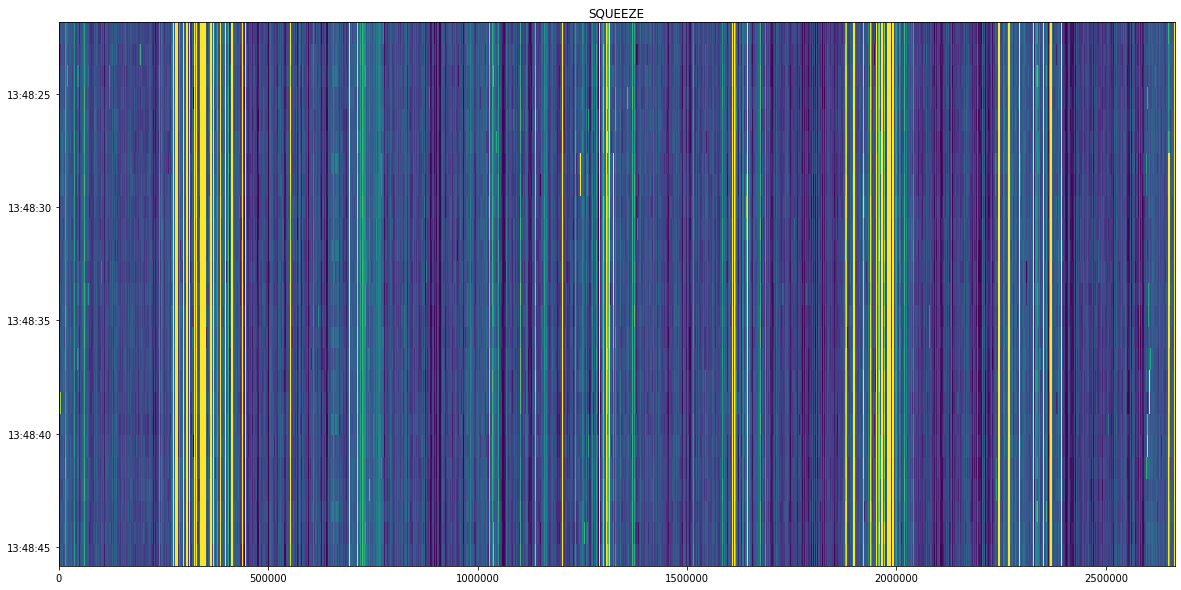

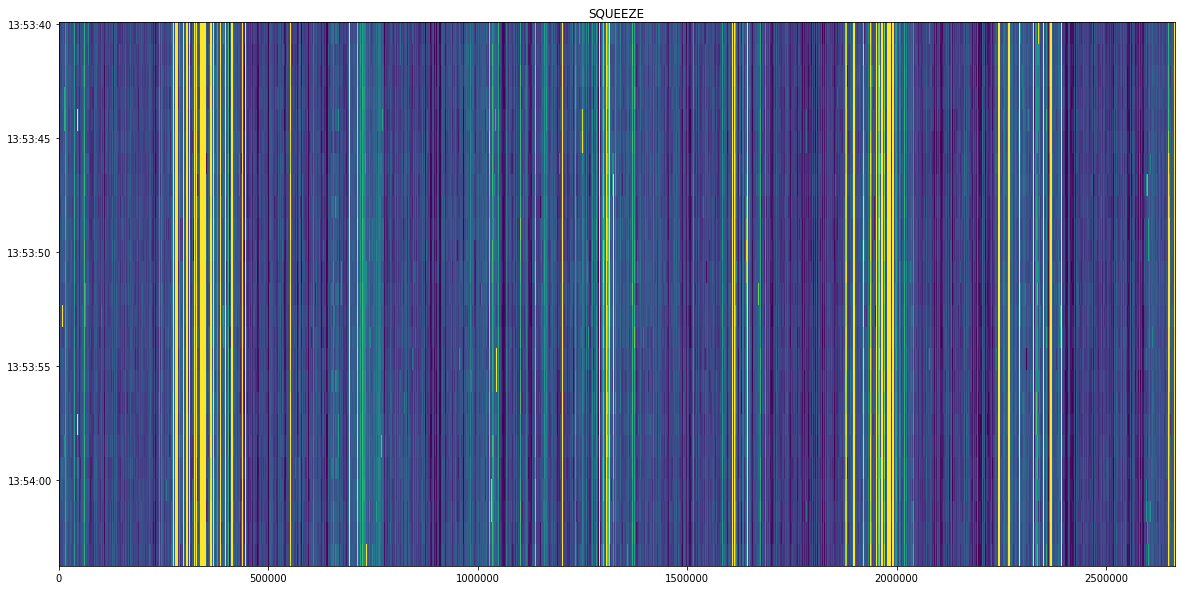

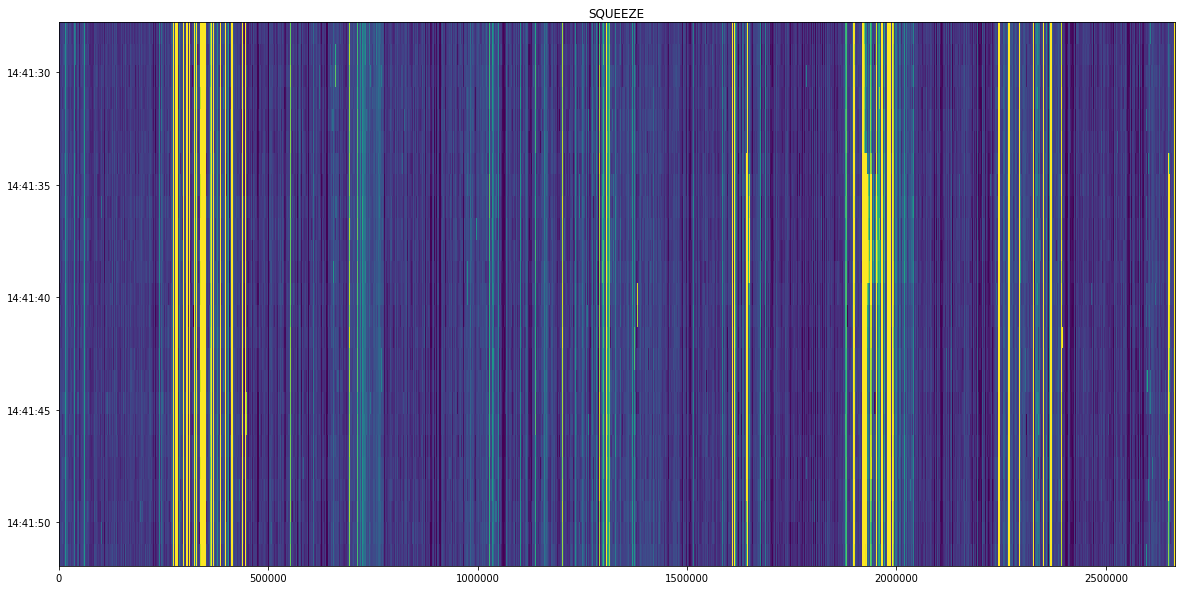

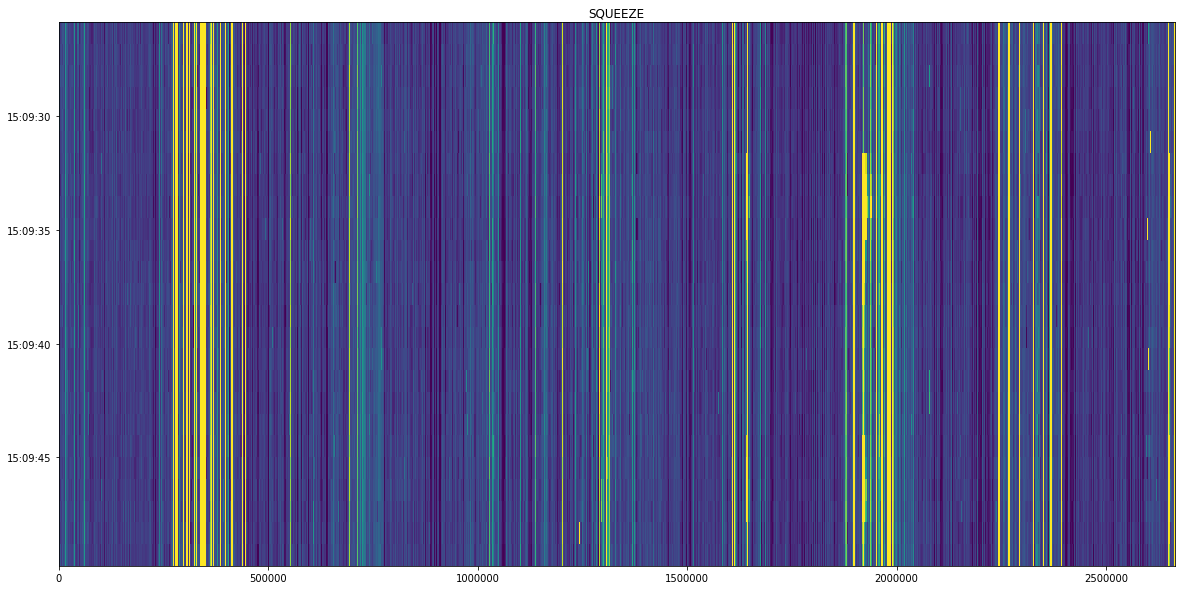

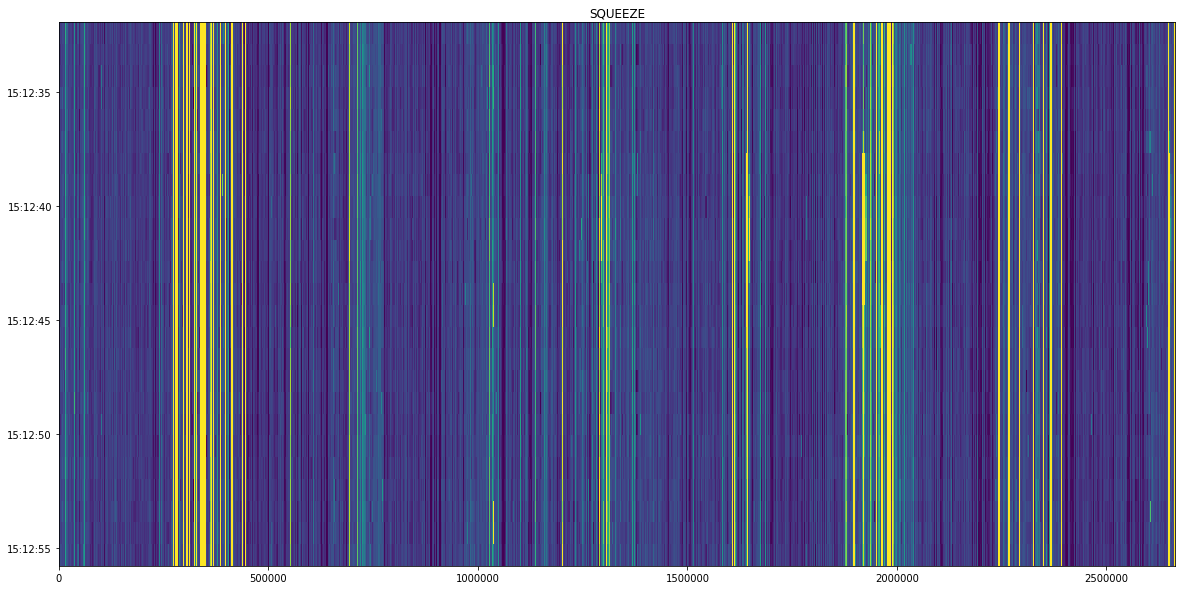

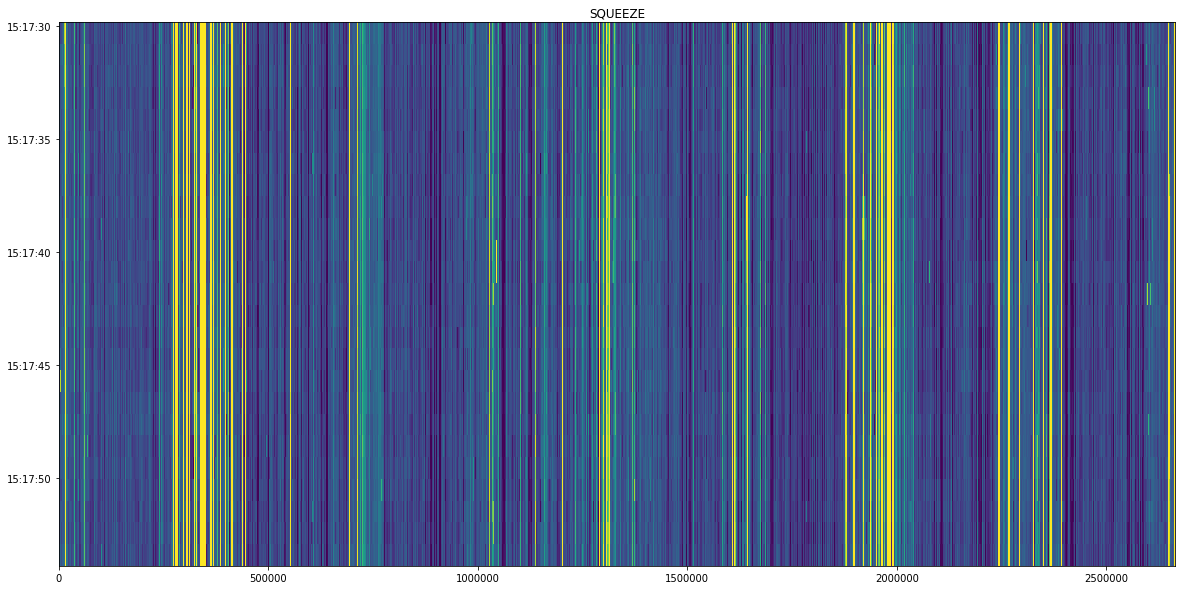

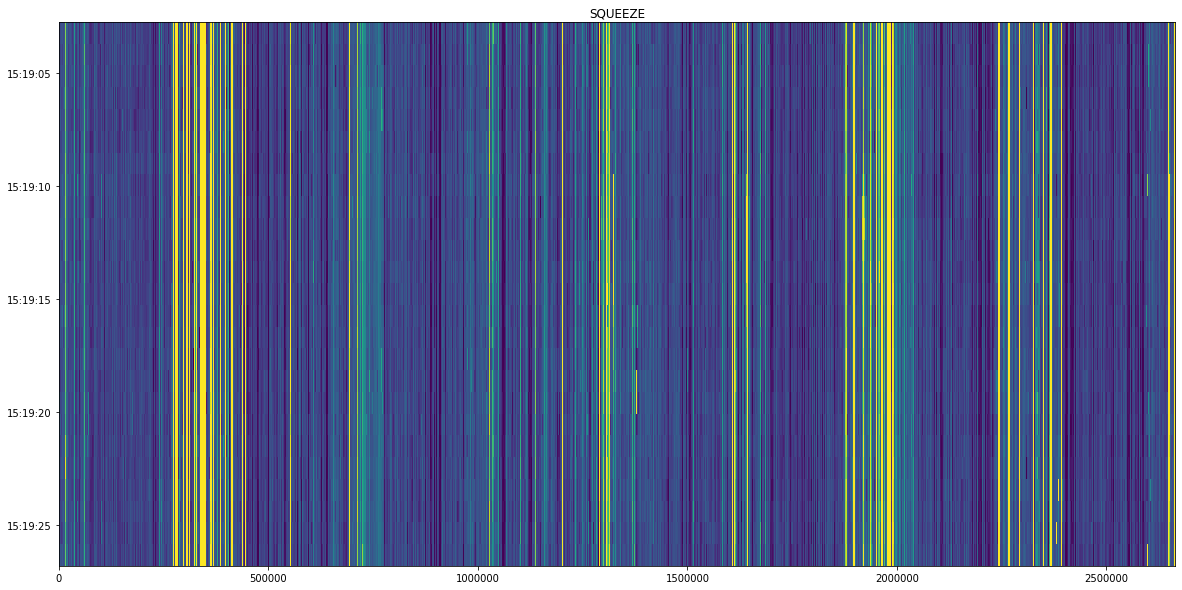

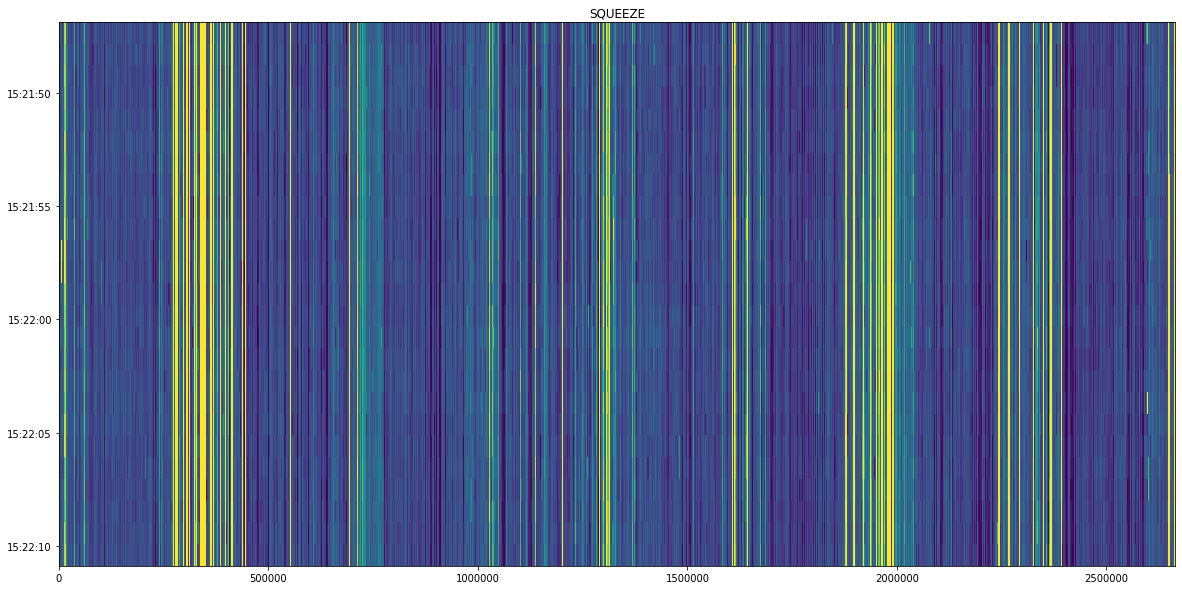

In [5]:
for BLM_data in fetcher.iter_from_ADT(t1, t2, look_back='5S', look_forward='20S', planes=['H'], beams=[1]):
    BLM_data.plot(min_max_quantile=0.95)

Getting a loss map from the data

In [6]:
BLM_data.context

{'trigger_t': Timestamp('2018-04-06 15:21:51.479000092+0200', tz='Europe/Zurich'),
 'trigger_beam': 'B1',
 'trigger_plane': 'H'}

The BLM_max BLMs are the B1 subset, as the ADT trigger is on B1H.

In [7]:
BLM_data.BLM_max

['BLMTI.06L3.B1I10_TCP.6L3.B1',
 'BLMTI.06L7.B1E10_TCP.D6L7.B1',
 'BLMTI.06L7.B1E10_TCP.C6L7.B1',
 'BLMTI.06L7.B1E10_TCP.B6L7.B1']

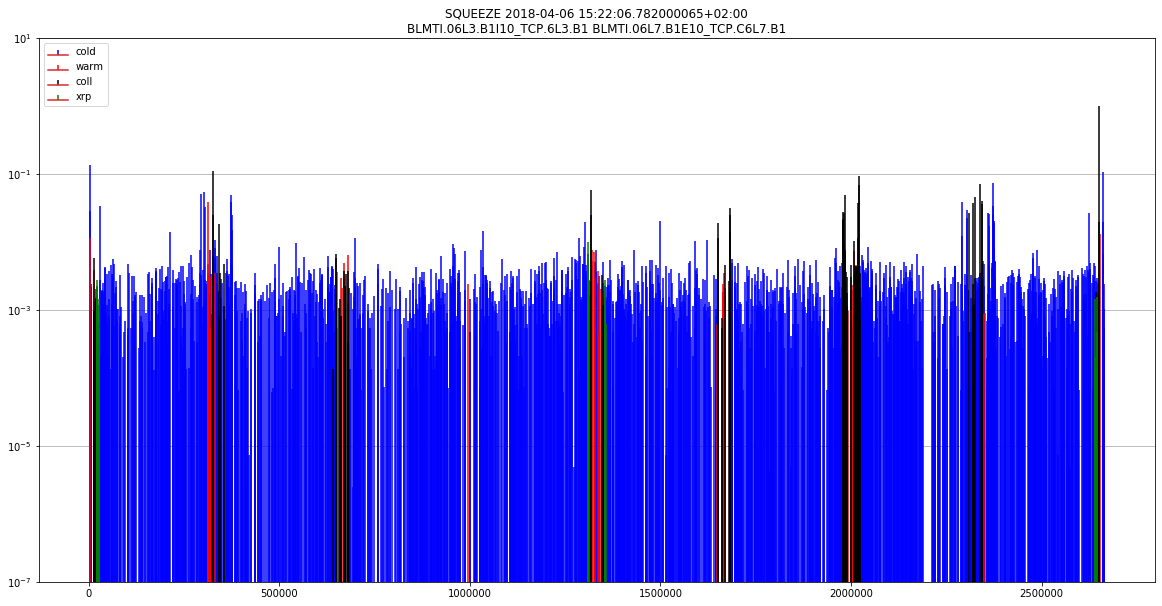

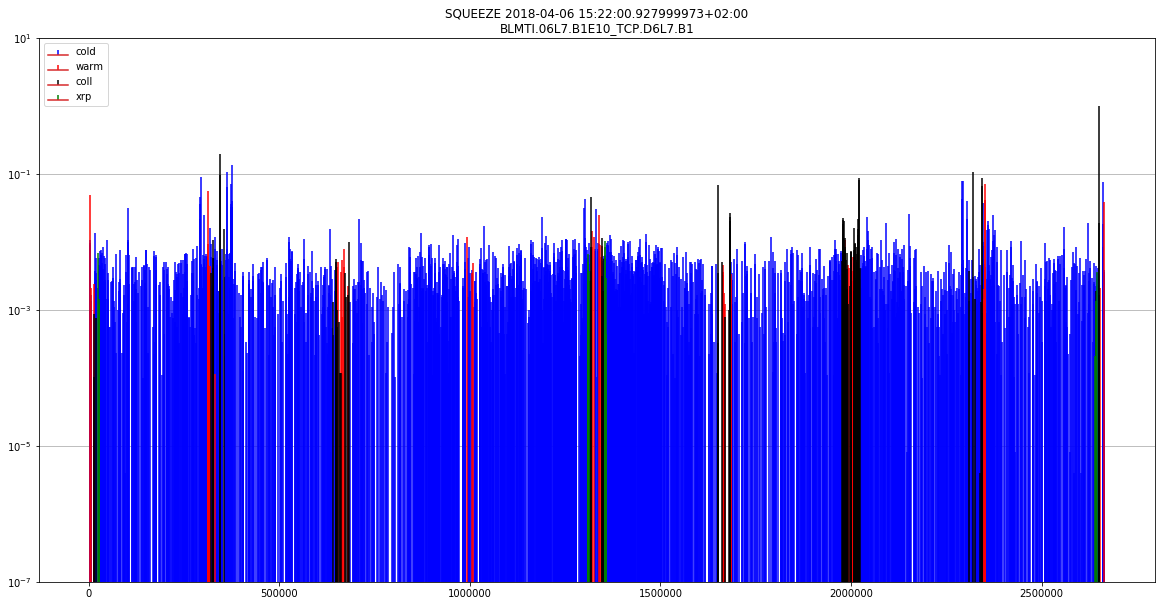

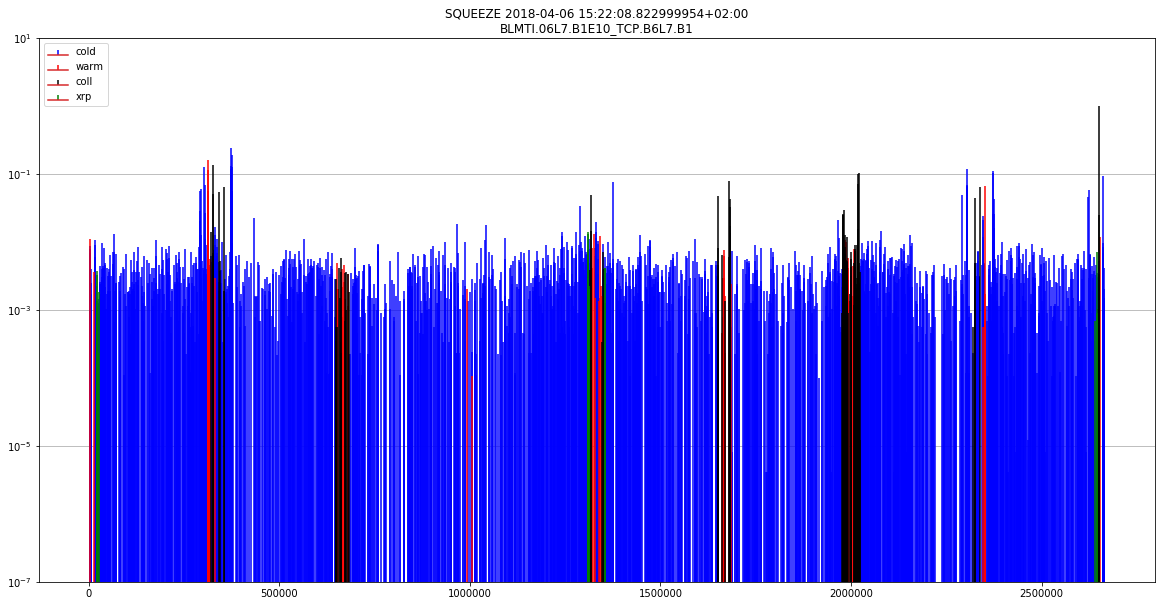

In [8]:
for idx, blms in BLM_data.iter_maxes():
    row = BLM_data.data.loc[idx]
    LM = BLM_data.loss_map(row=row, datetime=idx[1], background='fetch', trigger_t=BLM_data.context['trigger_t'])
    LM.clean_bg().normalize().plot(title=f'{idx[0]} {idx[1]}\n{" ".join(blms)}')

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc034503910>)

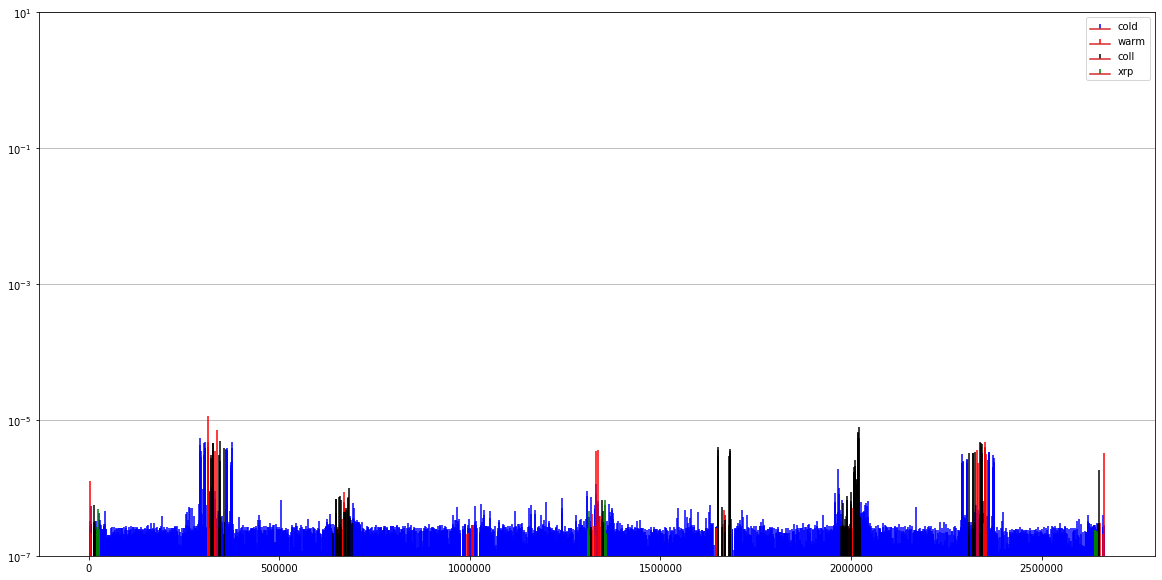

In [9]:
LM.plot(data=LM.background.mean())